In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/DICK Project/EMR/patient_information.csv'
df = pd.read_csv(file_path)
df.head(10)

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,12/20/18 11:20,12/21/18 12:15,1.0,No,12/20/18 0:00,47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,9/27/19 9:02,10/18/19 18:13,21.0,Yes,9/27/19 0:00,81,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,4/8/19 9:33,4/11/19 12:34,3.0,Yes,4/8/19 0:00,49,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,12/3/18 5:57,12/4/18 12:57,1.0,No,12/3/18 0:00,54,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,4/19/19 6:19,4/20/19 9:26,1.0,No,4/19/19 0:00,44,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00
5,8778901eeb9b6166,2e34dcb0791b8c0d,15.0,Home Routine,3/17/20 7:01,3/18/20 12:50,1.0,No,3/17/20 0:00,59,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,EGD (ESOPHAGOGASTRODUODENOSCOPY),3/17/20 8:18,3/17/20 10:19,3/17/20 8:18,3/17/20 10:22
6,d56378d6b879a646,1e3abeb304c6dfbc,15.0,Home Routine,11/20/19 5:30,11/20/19 11:27,0.0,No,11/20/19 0:00,56,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INJECTION, FAT GRAFT",11/20/19 7:11,11/20/19 10:05,11/20/19 7:11,11/20/19 10:12
7,91b48ef5ac2bb217,46c1f8933170ca25,15.0,Home Routine,3/1/19 6:03,3/2/19 11:46,1.0,No,3/1/19 0:00,32,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"MYOMECTOMY, UTERUS, ROBOT-ASSISTED, LAPAROSCOPIC",3/1/19 8:11,3/1/19 14:15,3/1/19 8:12,3/1/19 14:21
8,1906cc82ba498914,ec65fcf9422707a0,15.0,Home Routine,6/23/19 5:14,6/23/19 9:35,0.0,No,6/23/19 0:00,57,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"HYSTEROSCOPY, WITH BIOPSY OR POLYPECTOMY",6/23/19 7:12,6/23/19 8:19,6/23/19 7:12,6/23/19 8:25
9,a724284bc59fe51a,bfec22a4fe8ece9f,15.0,Home Routine,1/15/19 6:20,1/15/19 19:11,0.0,No,1/15/19 0:00,60,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1/15/19 8:22,1/15/19 14:59,1/15/19 8:22,1/15/19 15:07


# **Calculate Length of Stay and check with LOS column. Using Admission time and Discharge time.**

In [3]:
df['HOSP_ADMSN_TIME'] = pd.to_datetime(df['HOSP_ADMSN_TIME'], format='%m/%d/%y %H:%M')
df['HOSP_DISCH_TIME'] = pd.to_datetime(df['HOSP_DISCH_TIME'], format='%m/%d/%y %H:%M')
df['calculated_LOS'] = (df['HOSP_DISCH_TIME'] - df['HOSP_ADMSN_TIME']).dt.days

# Compare 'LOS' with 'calculated_LOS'
df['LOS_matches'] = df['LOS'] == df['calculated_LOS']
df[['HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME', 'LOS', 'calculated_LOS', 'LOS_matches']]

,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,calculated_LOS,LOS_matches
0,2018-12-20 11:20:00,2018-12-21 12:15:00,1.0,1.0,True
1,2019-09-27 09:02:00,2019-10-18 18:13:00,21.0,21.0,True
2,2019-04-08 09:33:00,2019-04-11 12:34:00,3.0,3.0,True
3,2018-12-03 05:57:00,2018-12-04 12:57:00,1.0,1.0,True
4,2019-04-19 06:19:00,2019-04-20 09:26:00,1.0,1.0,True
...,...,...,...,...,...
65723,2021-06-07 03:35:00,2021-08-03 13:00:00,57.0,57.0,True
65724,2021-11-11 13:14:00,2021-11-11 20:14:00,0.0,0.0,True
65725,2022-03-07 11:24:00,2022-03-08 11:30:00,1.0,1.0,True
65726,2022-09-06 10:25:00,2022-09-06 22:50:00,0.0,0.0,True


In [4]:
if df['LOS_matches'].all():
    print("LOS matches for all entries.")
else:
    print("LOS does not match for some entries.")


LOS does not match for some entries.


In [5]:
mismatched_rows = df[df['LOS_matches'] == False]
num_mismatches = len(mismatched_rows)
print(f"Number of mismatched entries: {num_mismatches}")

# Print the mismatched rows
print("Mismatched rows:")
mismatched_rows[['HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME', 'LOS', 'calculated_LOS']]


Number of mismatched entries: 12208
Mismatched rows:


,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,calculated_LOS
46,2019-12-07 13:06:00,2019-12-08 11:47:00,1.0,0.0
68,2019-05-23 10:12:00,2019-05-25 09:19:00,2.0,1.0
91,2018-12-26 12:52:00,2018-12-30 11:15:00,4.0,3.0
123,2019-04-28 13:01:00,2019-05-01 10:46:00,3.0,2.0
134,2019-04-09 10:27:00,2019-04-11 08:52:00,2.0,1.0
...,...,...,...,...
65688,2021-07-01 14:06:00,2021-07-02 10:37:00,1.0,0.0
65689,2021-05-24 20:19:00,2021-06-06 18:36:00,13.0,12.0
65697,2022-02-11 23:14:00,2022-02-16 16:15:00,5.0,4.0
65699,2022-07-02 18:45:00,2022-07-06 10:51:00,4.0,3.0


In [6]:
df['ADMSN_DATE'] = pd.to_datetime(df['HOSP_ADMSN_TIME']).dt.date
df['DISCH_DATE'] = pd.to_datetime(df['HOSP_DISCH_TIME']).dt.date

df['calculated_LOS'] = (df['DISCH_DATE'] - df['ADMSN_DATE']).apply(lambda x: x.days if pd.notnull(x) else np.nan)

df['calculated_LOS'] = df['calculated_LOS'].apply(lambda x: x if x > 0 else 0)

df['LOS_matches'] = df['LOS'] == df['calculated_LOS']

mismatched_rows = df[df['LOS_matches'] == False]

print(f"Number of mismatched entries: {len(mismatched_rows)}")
mismatched_rows[['HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME', 'LOS', 'calculated_LOS']]


Number of mismatched entries: 14


,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,calculated_LOS
36762,2022-01-03 00:38:00,NaT,NaN,0.0
38243,2022-01-03 00:38:00,NaT,NaN,0.0
38252,2022-01-03 00:38:00,NaT,NaN,0.0
40606,2022-09-15 15:33:00,NaT,NaN,0.0
42417,2022-09-15 15:33:00,NaT,NaN,0.0
42581,2022-09-15 15:33:00,NaT,NaN,0.0
42847,2022-01-03 00:38:00,NaT,NaN,0.0
46265,2022-09-15 15:33:00,NaT,NaN,0.0
53600,2022-09-15 15:33:00,NaT,NaN,0.0
55370,2022-09-15 15:33:00,NaT,NaN,0.0


In [7]:
df['HOSP_ADMSN_TIME'] = pd.to_datetime(df['HOSP_ADMSN_TIME'], errors='coerce')
df['HOSP_DISCH_TIME'] = pd.to_datetime(df['HOSP_DISCH_TIME'], errors='coerce')

# Remove rows where HOSP_DISCH_TIME is NaT
df = df.dropna(subset=['HOSP_DISCH_TIME'])
df['ADMSN_DATE'] = df['HOSP_ADMSN_TIME'].dt.date
df['DISCH_DATE'] = df['HOSP_DISCH_TIME'].dt.date

df['calculated_LOS'] = (df['DISCH_DATE'] - df['ADMSN_DATE']).apply(lambda x: x.days)
df['calculated_LOS'] = df['calculated_LOS'].apply(lambda x: x if x >= 0 else 1)
df['LOS_matches'] = df['LOS'] == df['calculated_LOS']
mismatched_rows = df[df['LOS_matches'] == False]

print(f"Number of mismatched entries: {len(mismatched_rows)}")
mismatched_rows[['HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME', 'LOS', 'calculated_LOS']]

<ipython-input-7-a62f24ca9f00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADMSN_DATE'] = df['HOSP_ADMSN_TIME'].dt.date
<ipython-input-7-a62f24ca9f00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DISCH_DATE'] = df['HOSP_DISCH_TIME'].dt.date
<ipython-input-7-a62f24ca9f00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Number of mismatched entries: 0


,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,calculated_LOS


# **Remove Admission Date/Time and Discharge Date/Time columns**

In [8]:
df = df.drop(columns=['HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME','calculated_LOS'])
df = df.dropna(subset=['LOS'])
# These columns were added to simplify the earlier calculations so dropping them now
df = df.drop(columns=['LOS_matches'])
df = df.drop(columns=['ADMSN_DATE','DISCH_DATE'])

In [9]:
df.head(10)

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,No,12/20/18 0:00,47,NaN,2832.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,Yes,9/27/19 0:00,81,5' 6,2515.01,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,Yes,4/8/19 0:00,49,NaN,1964.74,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,No,12/3/18 0:00,54,5' 3,2638.47,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,No,4/19/19 0:00,44,NaN,1880.08,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00
5,8778901eeb9b6166,2e34dcb0791b8c0d,15.0,Home Routine,1.0,No,3/17/20 0:00,59,5' 6,2640.00,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,EGD (ESOPHAGOGASTRODUODENOSCOPY),3/17/20 8:18,3/17/20 10:19,3/17/20 8:18,3/17/20 10:22
6,d56378d6b879a646,1e3abeb304c6dfbc,15.0,Home Routine,0.0,No,11/20/19 0:00,56,5' 4,3026.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INJECTION, FAT GRAFT",11/20/19 7:11,11/20/19 10:05,11/20/19 7:11,11/20/19 10:12
7,91b48ef5ac2bb217,46c1f8933170ca25,15.0,Home Routine,1.0,No,3/1/19 0:00,32,NaN,2927.71,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"MYOMECTOMY, UTERUS, ROBOT-ASSISTED, LAPAROSCOPIC",3/1/19 8:11,3/1/19 14:15,3/1/19 8:12,3/1/19 14:21
8,1906cc82ba498914,ec65fcf9422707a0,15.0,Home Routine,0.0,No,6/23/19 0:00,57,5' 6,2169.33,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"HYSTEROSCOPY, WITH BIOPSY OR POLYPECTOMY",6/23/19 7:12,6/23/19 8:19,6/23/19 7:12,6/23/19 8:25
9,a724284bc59fe51a,bfec22a4fe8ece9f,15.0,Home Routine,0.0,No,1/15/19 0:00,60,NaN,3128.77,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1/15/19 8:22,1/15/19 14:59,1/15/19 8:22,1/15/19 15:07


# **Encode the ICU admission flag column to 0 or 1.**

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['ICU_ADMIN_FLAG'] = label_encoder.fit_transform(df['ICU_ADMIN_FLAG'])
df.head()


,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,12/20/18 0:00,47,NaN,2832.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,9/27/19 0:00,81,5' 6,2515.01,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,4/8/19 0:00,49,NaN,1964.74,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,12/3/18 0:00,54,5' 3,2638.47,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,4/19/19 0:00,44,NaN,1880.08,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00


# **Encode the Sex column to 0 or 1.**

In [11]:
label_encoder = LabelEncoder()

df['SEX'] = label_encoder.fit_transform(df['SEX'])
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,12/20/18 0:00,47,NaN,2832.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,9/27/19 0:00,81,5' 6,2515.01,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,4/8/19 0:00,49,NaN,1964.74,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,12/3/18 0:00,54,5' 3,2638.47,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,4/19/19 0:00,44,NaN,1880.08,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00


# **Change the format of Surgery Date column to datetime.**

In [12]:
df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'], format='%m/%d/%y %H:%M')
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00


# **Encode the Patient Class Name column**

In [13]:
label_encoder = LabelEncoder()
df['PATIENT_CLASS_NM_ENCODED'] = label_encoder.fit_transform(df['PATIENT_CLASS_NM'])
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME,PATIENT_CLASS_NM_ENCODED
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34,1
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44,1
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53,0
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52,1
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00,1


# **Encode the Patient Class Group column**

In [14]:
label_encoder = LabelEncoder()
df['PATIENT_CLASS_GROUP_ENCODED'] = label_encoder.fit_transform(df['PATIENT_CLASS_GROUP'])
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",12/20/18 12:27,12/20/18 17:25,12/20/18 12:27,12/20/18 17:34,1,1
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,9/27/19 9:52,9/27/19 11:27,9/27/19 9:52,9/27/19 11:44,1,1
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,4/8/19 14:41,4/8/19 18:46,4/8/19 14:41,4/8/19 18:53,0,0
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",12/3/18 8:09,12/3/18 11:49,12/3/18 8:09,12/3/18 11:52,1,1
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",4/19/19 8:13,4/19/19 14:51,4/19/19 8:14,4/19/19 15:00,1,1


# **Calculate the number of hours spent in operation room using the columns OR in time and OR out time**

In [15]:
df['OUT_OR_DTTM'] = pd.to_datetime(df['OUT_OR_DTTM'], format='%m/%d/%y %H:%M')
df['IN_OR_DTTM'] = pd.to_datetime(df['IN_OR_DTTM'], format='%m/%d/%y %H:%M')
df['OR_LOS_HOURS'] = (df['OUT_OR_DTTM'] - df['IN_OR_DTTM']).dt.total_seconds()/3600
df['OR_LOS_HOURS'] = df['OR_LOS_HOURS'].round(2)
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",2018-12-20 12:27:00,2018-12-20 17:25:00,12/20/18 12:27,12/20/18 17:34,1,1,4.97
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,2019-09-27 09:52:00,2019-09-27 11:27:00,9/27/19 9:52,9/27/19 11:44,1,1,1.58
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,2019-04-08 14:41:00,2019-04-08 18:46:00,4/8/19 14:41,4/8/19 18:53,0,0,4.08
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",2018-12-03 08:09:00,2018-12-03 11:49:00,12/3/18 8:09,12/3/18 11:52,1,1,3.67
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",2019-04-19 08:13:00,2019-04-19 14:51:00,4/19/19 8:14,4/19/19 15:00,1,1,6.63


# **Calculate the number of hours patient was under Anesthesia using the columns AN in time and AN out time**

In [16]:
df['AN_START_DATETIME'] = pd.to_datetime(df['AN_START_DATETIME'], format='%m/%d/%y %H:%M')
df['AN_STOP_DATETIME'] = pd.to_datetime(df['AN_STOP_DATETIME'], format='%m/%d/%y %H:%M')
df['AN_LOS_HOURS'] = (df['AN_START_DATETIME'] - df['AN_STOP_DATETIME']).dt.total_seconds()/3600
df['AN_LOS_HOURS'] = df['OR_LOS_HOURS'].round(2)
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",2018-12-20 12:27:00,2018-12-20 17:25:00,2018-12-20 12:27:00,2018-12-20 17:34:00,1,1,4.97,4.97
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,Hospital Outpatient Surgery,GI EGD DILATION,2019-09-27 09:52:00,2019-09-27 11:27:00,2019-09-27 09:52:00,2019-09-27 11:44:00,1,1,1.58,1.58
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,Hospital Inpatient Surgery,CRANIECTOMY,2019-04-08 14:41:00,2019-04-08 18:46:00,2019-04-08 14:41:00,2019-04-08 18:53:00,0,0,4.08,4.08
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",2018-12-03 08:09:00,2018-12-03 11:49:00,2018-12-03 08:09:00,2018-12-03 11:52:00,1,1,3.67,3.67
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",2019-04-19 08:13:00,2019-04-19 14:51:00,2019-04-19 08:14:00,2019-04-19 15:00:00,1,1,6.63,6.63


# **Drop the four columns stating the in time and out time of operation room and anesthesia injection**

In [17]:
df = df.drop(columns=['IN_OR_DTTM','OUT_OR_DTTM','AN_START_DATETIME', 'AN_STOP_DATETIME'])
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",1,1,4.97,4.97
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,General,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,1,1,1.58,1.58
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,General,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,0,0,4.08,4.08
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,3.67,3.67
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,General,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,6.63,6.63


# **Converting the Height column from feet/inches into metres**

In [18]:
df.HEIGHT.dtype


dtype('O')

In [19]:
def convert_to_meters(height):
    if isinstance(height, str):
        try:
            feet, inches = height.split("'")
            feet = float(feet.strip())  # Convert feet to float
            inches = float(inches.strip())  # Convert inches to float
            total_meters = (feet * 0.3048) + (inches * 0.0254)
            return total_meters
        except ValueError:
            return np.nan
    elif isinstance(height, (int, float)):
        return height * 0.3048
    else:
        return np.nan

df['HEIGHT_METRES'] = df['HEIGHT'].apply(convert_to_meters)
df.HEIGHT_METRES = df.HEIGHT_METRES.round(2)
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,HEIGHT,WEIGHT,...,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS,HEIGHT_METRES
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,NaN,2832.47,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",1,1,4.97,4.97,NaN
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,5' 6,2515.01,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,1,1,1.58,1.58,1.68
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,NaN,1964.74,...,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,0,0,4.08,4.08,NaN
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,5' 3,2638.47,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,3.67,3.67,1.60
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,NaN,1880.08,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,6.63,6.63,NaN


# **Plotting the density plot of Height column**

<ipython-input-20-e9775e46d95d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['HEIGHT_METRES'], shade=True)


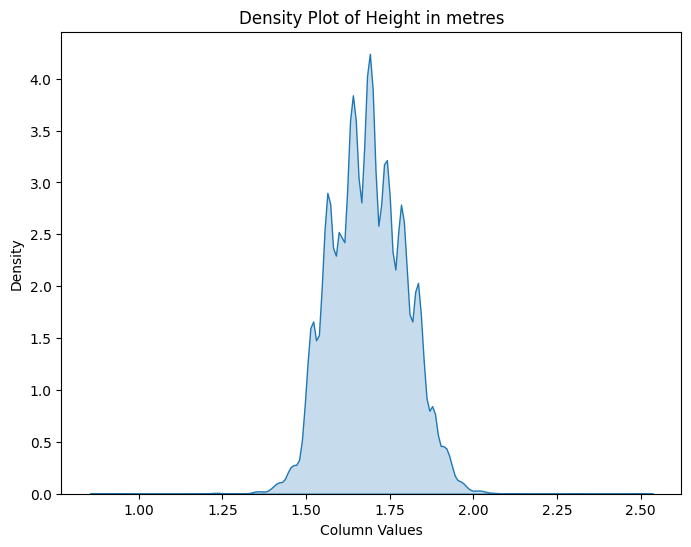

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(df['HEIGHT_METRES'], shade=True)

plt.xlabel('Column Values')
plt.ylabel('Density')
plt.title('Density Plot of Height in metres')

plt.show()


# **Filling the null values with mean of the column and the density plot resembles normal distribution.**

In [21]:
df = df.drop(columns='HEIGHT')
df['HEIGHT_METRES'].fillna(df['HEIGHT_METRES'].mean(), inplace=True)
df.HEIGHT_METRES = df.HEIGHT_METRES.round(2)
df.head()

<ipython-input-21-8e58cde6e2bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HEIGHT_METRES'].fillna(df['HEIGHT_METRES'].mean(), inplace=True)


,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,WEIGHT,SEX,...,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS,HEIGHT_METRES
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,2832.47,0,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",1,1,4.97,4.97,1.68
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,2515.01,1,...,3.0,Severe Systemic Disease,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,1,1,1.58,1.58,1.68
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,1964.74,0,...,2.0,Mild Systemic Disease,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,0,0,4.08,4.08,1.68
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,2638.47,0,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,3.67,3.67,1.60
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,1880.08,0,...,2.0,Mild Systemic Disease,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,6.63,6.63,1.68


In [22]:
df['HEIGHT_METRES'].fillna(df['HEIGHT_METRES'].mean(), inplace=True)


<ipython-input-22-907443356bd0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HEIGHT_METRES'].fillna(df['HEIGHT_METRES'].mean(), inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


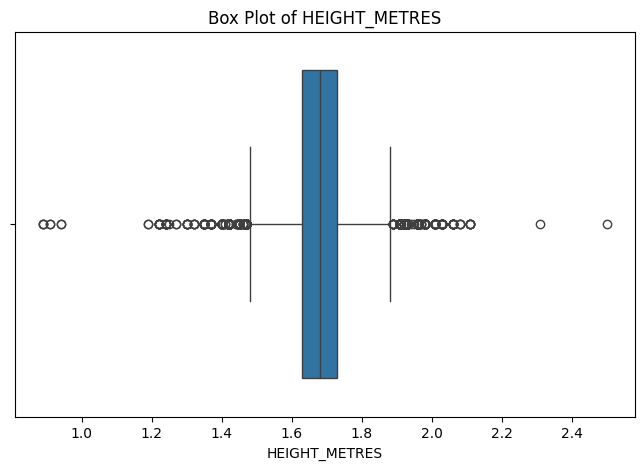

In [23]:
# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HEIGHT_METRES'])
plt.title('Box Plot of HEIGHT_METRES')
plt.xlabel('HEIGHT_METRES')
plt.show()

# **Remove the outlier Height values, i.e. height values greater than 2 and less than 1.3 metre**

(65714, 21)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


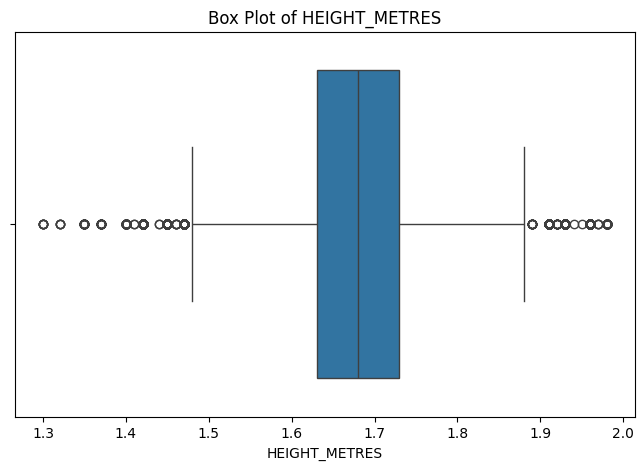

(65592, 21)


In [24]:
print(df.shape)
df = df[ df['HEIGHT_METRES'] <= 2]
df = df[ df['HEIGHT_METRES'] >= 1.3]
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HEIGHT_METRES'])
plt.title('Box Plot of HEIGHT_METRES')
plt.xlabel('HEIGHT_METRES')
plt.show()
print(df.shape)

# **Plotting the density plot of fthe weights column**

<ipython-input-25-6dfa8d6452e0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['WEIGHT'], shade=True)


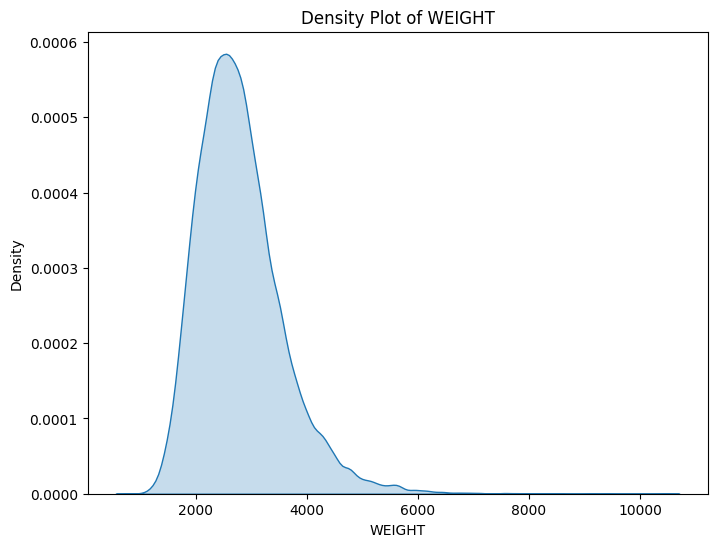

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(df['WEIGHT'], shade=True)

plt.xlabel('WEIGHT')
plt.ylabel('Density')
plt.title('Density Plot of WEIGHT')

plt.show()

# **Filling the null values in the weight column with median values as the density plot is skewered towards left.**

In [ ]:
df['WEIGHT'].fillna(df['WEIGHT'].median(), inplace=True)

<ipython-input-26-cffcb8947b89>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WEIGHT'].fillna(df['WEIGHT'].median(), inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


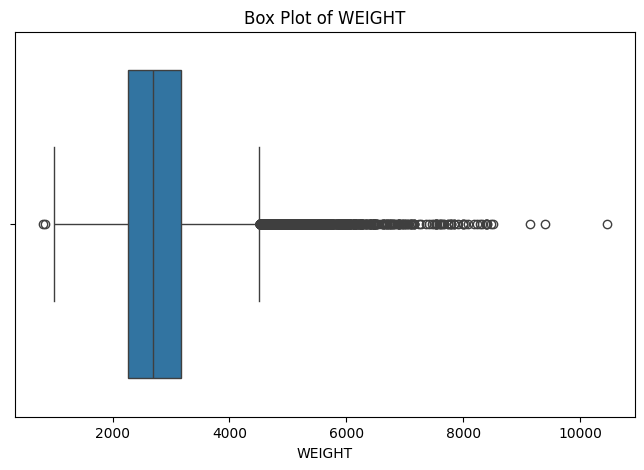

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['WEIGHT'])
plt.title('Box Plot of WEIGHT')
plt.xlabel('WEIGHT')
plt.show()

# **Remove the outlier Weight values, i.e. the values greater than 5000.**

In [ ]:
print(df.shape)
df= df[df['WEIGHT'] <= 5000]

(65592, 21)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


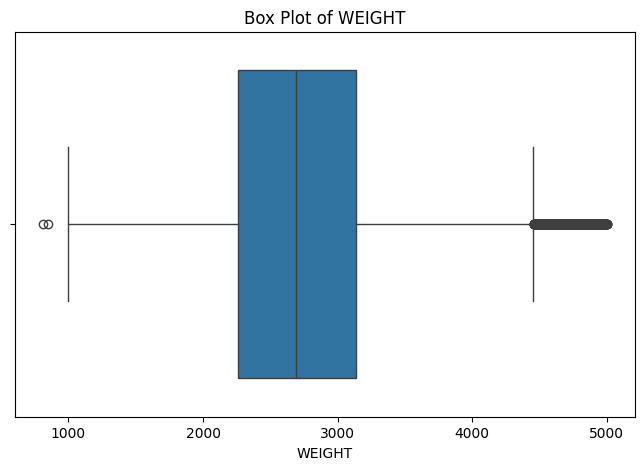

(64680, 21)


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['WEIGHT'])
plt.title('Box Plot of WEIGHT')
plt.xlabel('WEIGHT')
plt.show()
print(df.shape)

# **As the primary procedure names column consists of sentences, Auto Tokenizer has been used to embedd every string into unique tensor, hence encoding it.**

In [ ]:
df.PRIMARY_PROCEDURE_NM.dtype

dtype('O')

In [ ]:
from transformers import BertTokenizer
# Handle NaN values
df['PRIMARY_PROCEDURE_NM'] = df['PRIMARY_PROCEDURE_NM'].fillna("UNKNOWN")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def encode_sentence(sentence):
    return tokenizer.encode(sentence, add_special_tokens=True)

df['PRIMARY_PROCEDURE_NM_ENCODED'] = df['PRIMARY_PROCEDURE_NM'].apply(encode_sentence)

In [ ]:
df[['PRIMARY_PROCEDURE_NM', 'PRIMARY_PROCEDURE_NM_ENCODED']]

# **Dropped the Null values and encoded the Discharge Disposition column**

# **Dropped the Null values and encoded the Primary Anesthesia type column**

In [ ]:
import pickle
df = df.dropna(subset=['PRIMARY_ANES_TYPE_NM'])

label_encoder_2 = LabelEncoder()

label_encoder_2.fit(df['PRIMARY_ANES_TYPE_NM'])


with open('label_encoder_PRIMARY_ANES_TYPE_NM.pkl', 'wb') as f:
    pickle.dump(label_encoder_2, f)

with open('label_encoder_PRIMARY_ANES_TYPE_NM.pkl', 'rb') as f:
    loaded_encoder_2 = pickle.load(f)

df['PRIMARY_ANES_TYPE_NM_ENCODED'] = loaded_encoder_2.fit_transform(df['PRIMARY_ANES_TYPE_NM'])

label_mapping_2 = dict(zip(loaded_encoder_2.classes_, range(len(loaded_encoder_2.classes_))))
print("Label Mapping:", label_mapping_2)
df[['PRIMARY_ANES_TYPE_NM', 'PRIMARY_ANES_TYPE_NM_ENCODED']]

In [ ]:
df.to_csv('Patient_information_cleaned.csv', index=False)